In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("per-capita-energy-use.csv")
df.head()

,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932201
1,Afghanistan,AFG,1981,662.912777
2,Afghanistan,AFG,1982,709.075252
3,Afghanistan,AFG,1983,877.845852
4,Afghanistan,AFG,1984,905.948350


In [ ]:
df.shape

(8961, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               8961 non-null   object 
 1   Code                                 8796 non-null   object 
 2   Year                                 8961 non-null   int64  
 3   Energy consumption per capita (kWh)  8961 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 280.2+ KB


In [ ]:
df.isna().sum()

,0
Entity,0
Code,165
Year,0
Energy consumption per capita (kWh),0


In [ ]:
df["Year"].min()

1965

In [ ]:
df["Year"].max()

2019

# India's Year-wise Electric Consumption


In [ ]:
# Dropping colum called "Code" as "Entity" and "Code" are sharing same informations
df.drop(columns="Code", inplace=True)

In [ ]:
India_Electricity_Consumption = df.loc[df["Entity"]=="India"]
India_Electricity_Consumption.head()

,Entity,Year,Energy consumption per capita (kWh)
3686,India,1965,1234.198745
3687,India,1966,1245.658295
3688,India,1967,1257.530489
3689,India,1968,1315.776004
3690,India,1969,1427.495568


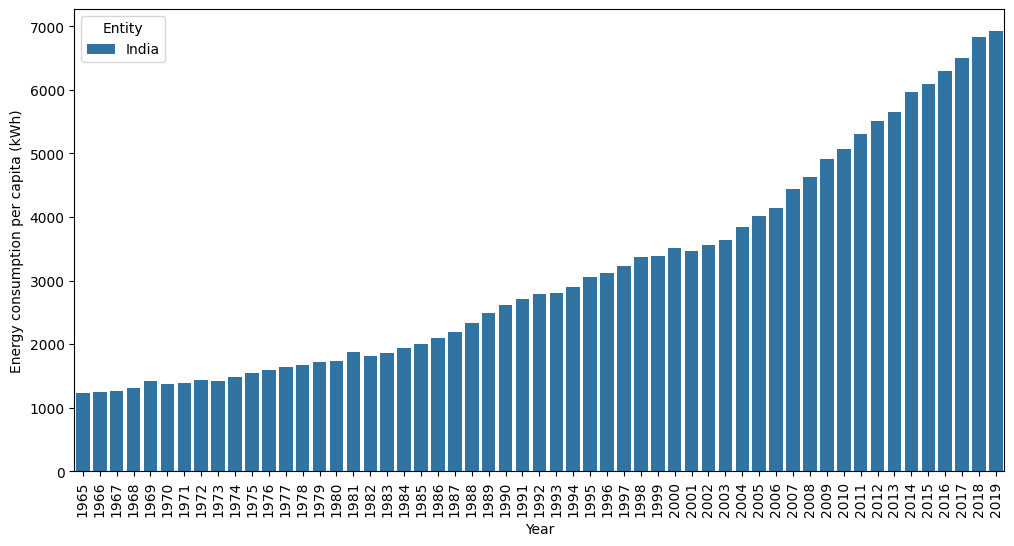

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Energy consumption per capita (kWh)", hue="Entity", data=India_Electricity_Consumption)
plt.xticks(rotation=90)
plt.show()

# China's year-wise Electric Consumption

In [ ]:
China_Electricity_Consumption = df.loc[df["Entity"]=="China"]
China_Electricity_Consumption.head()

,Entity,Year,Energy consumption per capita (kWh)
1638,China,1965,2115.707306
1639,China,1966,2243.057533
1640,China,1967,1963.851617
1641,China,1968,1929.150238
1642,China,1969,2284.182779


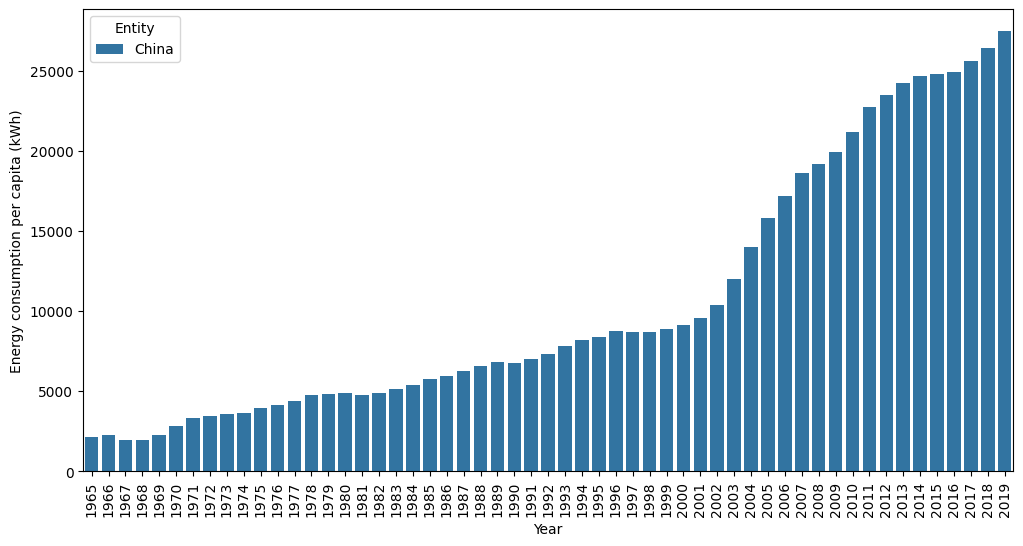

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Energy consumption per capita (kWh)", hue="Entity", data=China_Electricity_Consumption)
plt.xticks(rotation=90)
plt.show()

# USA's year-wise Electric Consumption

In [ ]:
USA_Electricity_Consumption = df.loc[df["Entity"]=="United States"]
USA_Electricity_Consumption.head()

,Entity,Year,Energy consumption per capita (kWh)
8447,United States,1965,72921.759575
8448,United States,1966,76198.585061
8449,United States,1967,78075.334399
8450,United States,1968,82061.022542
8451,United States,1969,85676.866993


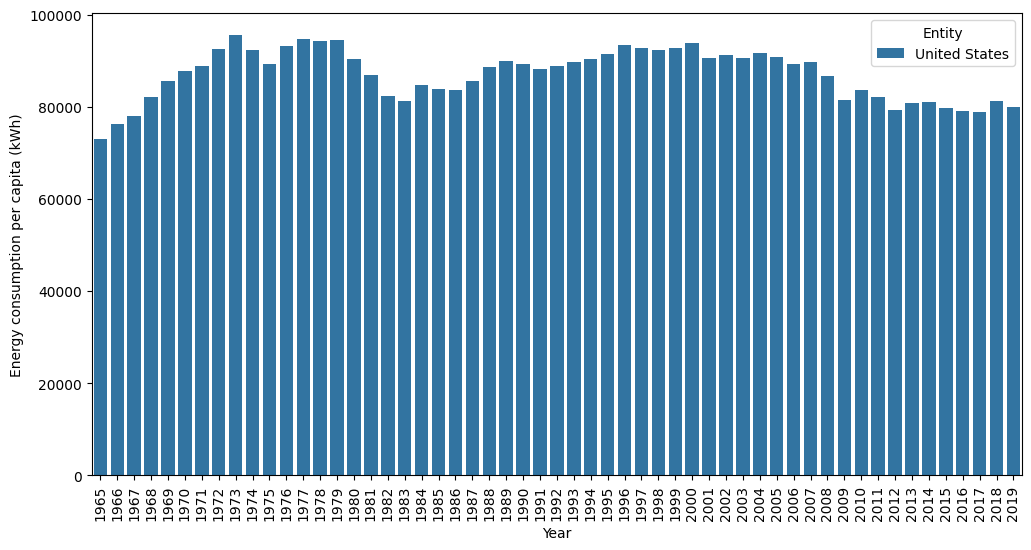

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Energy consumption per capita (kWh)", hue="Entity", data=USA_Electricity_Consumption)
plt.xticks(rotation=90)
plt.show()

# India's Electric Consumption prediction

In [ ]:
India_Electricity_Consumption.head()

,Entity,Year,Energy consumption per capita (kWh)
3686,India,1965,1234.198745
3687,India,1966,1245.658295
3688,India,1967,1257.530489
3689,India,1968,1315.776004
3690,India,1969,1427.495568


In [ ]:
India_Electricity_Consumption = df.loc[df["Entity"]=="India"].copy()
India_Electricity_Consumption.drop(columns="Entity", inplace=True)

In [ ]:
x = India_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = India_Electricity_Consumption["Energy consumption per capita (kWh)"]

In [ ]:
x.head()

,Year
3686,1965
3687,1966
3688,1967
3689,1968
3690,1969


In [ ]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x["Year_encoded"] = scaler.fit_transform(x[["Year"]])

In [ ]:
x.drop(columns="Year", inplace=True)
x.head()

,Year_encoded
3686,0.000000
3687,0.018519
3688,0.037037
3689,0.055556
3690,0.074074


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 1)
(17, 1)
(38,)
(17,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([3544.92276404,  892.93956337, 3646.92211791, 1708.93439435,
       2320.93051758, 5380.91113374, 4564.91630276, 3034.92599468,
       4768.91501051, 1606.93504048, 5686.90919535,  688.94085563,
       3748.92147179, 3850.92082566, 1198.93762499, 2116.93180984,
        994.93891725])

In [ ]:
y_pred1 = model.predict(x_train)
y_pred1

array([ 790.9402095 , 5176.91242599, 3136.92534856, 5074.91307212,
       4972.91371825, 5788.90854922, 1912.93310209, 1300.93697886,
       2014.93245596, 2830.92728694, 3442.92341017, 4156.91888727,
       2932.92664081, 1504.93568661,  382.94279401, 5278.91177986,
       4054.9195334 , 3340.9240563 , 4462.91694889,  484.94214789,
       2524.92922532,  586.94150176, 5482.91048761, 4360.91759502,
       3952.92017953, 2728.92793307, 4870.91436438, 1402.93633273,
       2626.9285792 , 2218.93116371, 5890.9079031 , 2422.92987145,
       1096.93827112, 4666.91565663, 1810.93374822, 3238.92470243,
       5584.90984148, 4258.91824115])

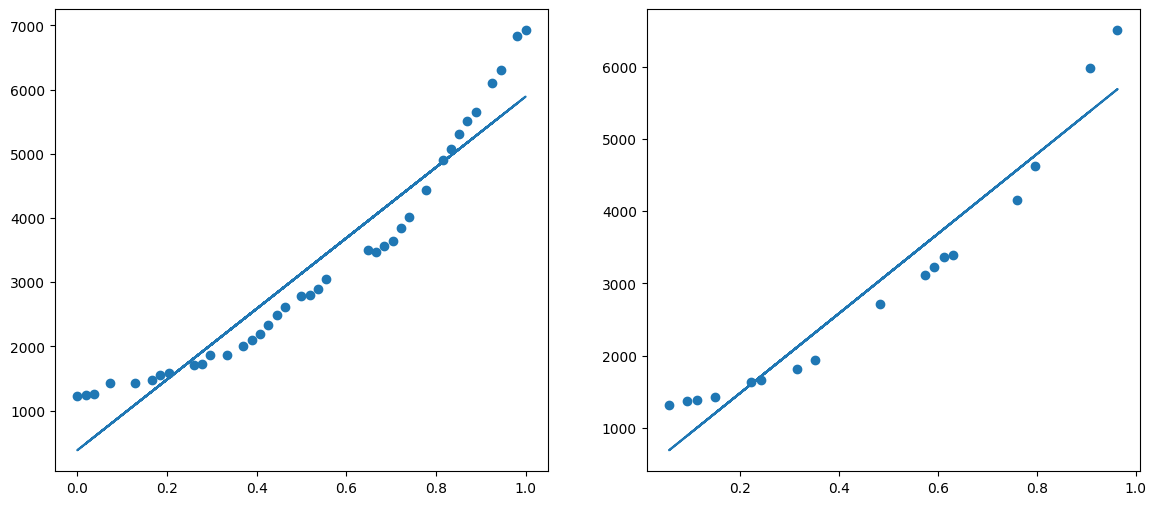

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(x_train,y_train)
plt.plot(x_train, y_pred1)

plt.subplot(1,2,2)
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 181452.6434248776


In [ ]:
from sklearn.metrics import r2_score
test_accuracy = r2_score(y_test, y_pred)
print("Test Accuracy (R-squared):", test_accuracy)

Test Accuracy (R-squared): 0.9268271129839437


In [ ]:
train_accuracy = r2_score(y_train, y_pred1)
print("Train Accuracy (R-squared):", train_accuracy)

Train Accuracy (R-squared): 0.9157407269338135


In [ ]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [ ]:
x = India_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = India_Electricity_Consumption["Energy consumption per capita (kWh)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

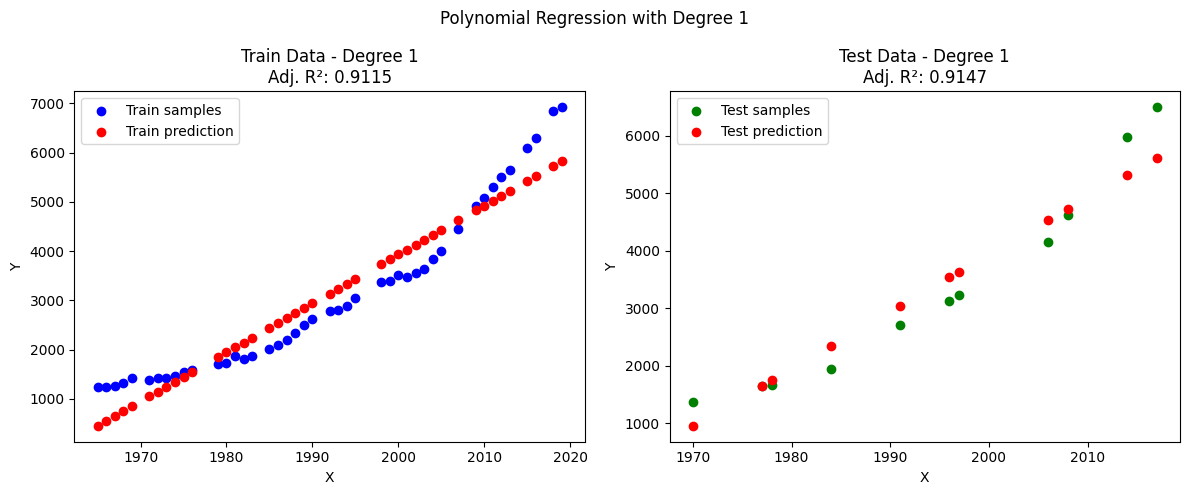

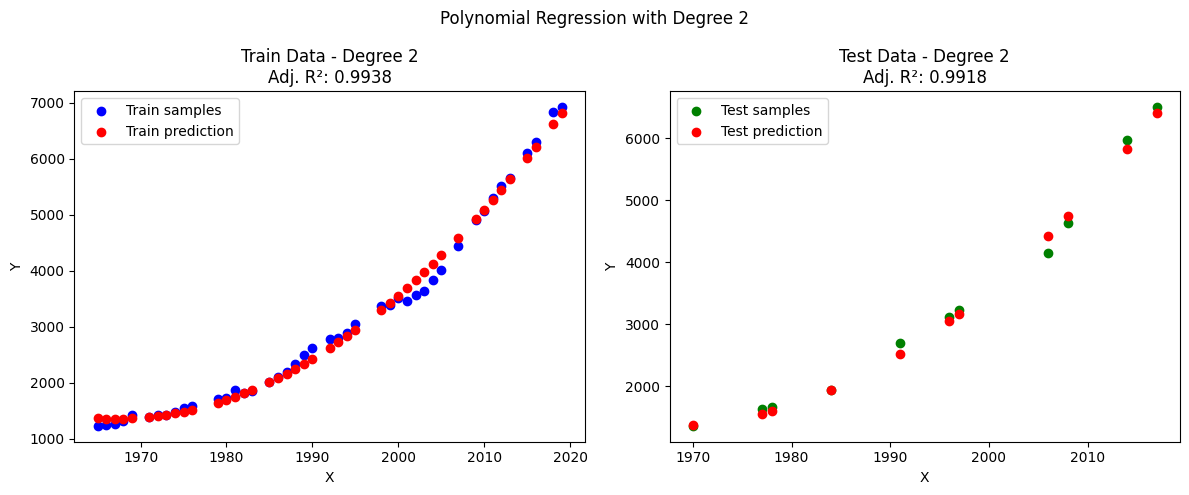

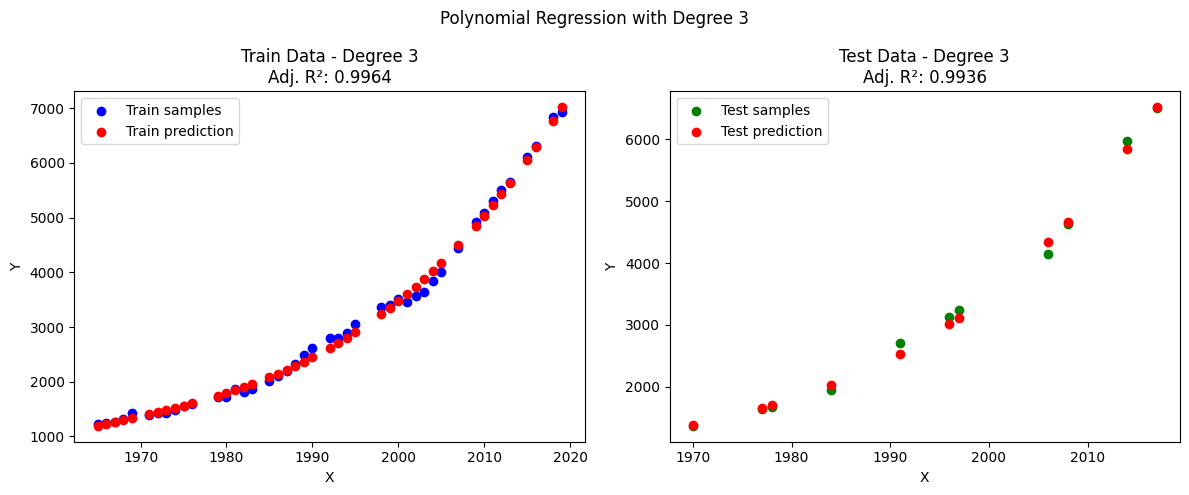

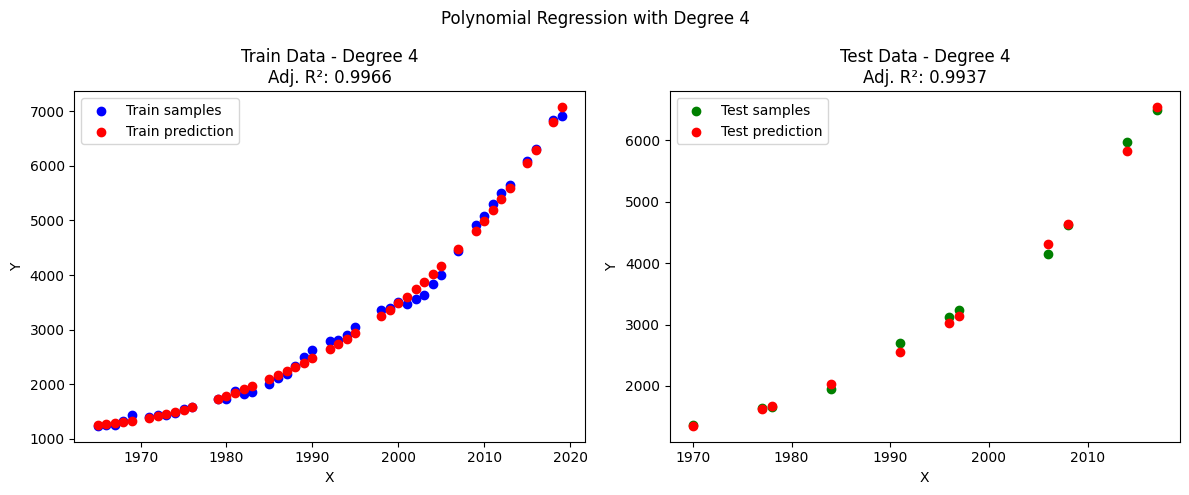

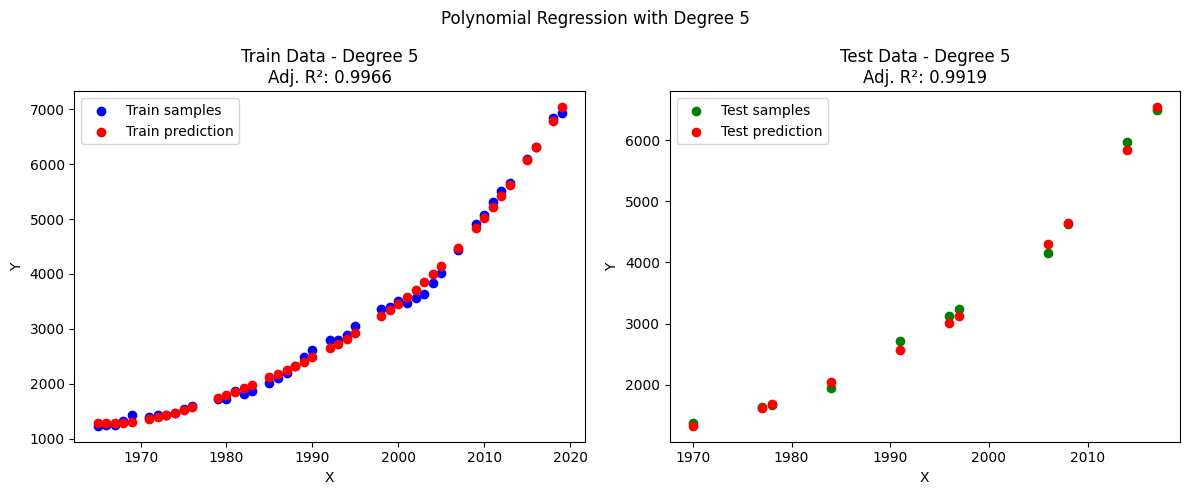

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train) # Use X_train, not x_train
    X_test_poly = poly.transform(X_test)

    #Standardization
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    #training model
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train) # Now the shapes should match

    #Prediction
    y_train_pred = model.predict(X_train_poly_scaled)
    y_test_pred = model.predict(X_test_poly_scaled)

    #calculated adjusted r2-score for train and test
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    adj_train_r2 = adj_r(train_r2, X_train_poly_scaled, y_train) # Use adj_r, not adj_r2_score
    adj_test_r2 = adj_r(test_r2, X_test_poly_scaled, y_test)

    #store scores
    scores.append((i, adj_train_r2, adj_test_r2))

    # Plotting graphs side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Training data plot
    axes[0].scatter(X_train.values.flatten(), y_train, label="Train samples", color='blue') # Flatten X_train for plotting
    axes[0].scatter(X_train.values.flatten(), y_train_pred, label="Train prediction", color='red')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    axes[0].set_title(f"Train Data - Degree {i}\nAdj. R²: {adj_train_r2:.4f}")
    axes[0].legend()

    # Test data plot
    axes[1].scatter(X_test.values.flatten(), y_test, label="Test samples", color='green') # Flatten X_test for plotting
    axes[1].scatter(X_test.values.flatten(), y_test_pred, label="Test prediction", color='red')
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")
    axes[1].set_title(f"Test Data - Degree {i}\nAdj. R²: {adj_test_r2:.4f}")
    axes[1].legend()

    plt.suptitle(f"Polynomial Regression with Degree {i}")
    plt.tight_layout()
    plt.show()

# China's Electricity Consumption Prediction

In [ ]:
China_Electricity_Consumption = df.loc[df["Entity"]=="China"].copy()
China_Electricity_Consumption.drop(columns="Entity", inplace=True)

In [ ]:
x = China_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = China_Electricity_Consumption["Energy consumption per capita (kWh)"]

In [ ]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x["Year_encoded"] = scaler.fit_transform(x[["Year"]])
x.drop(columns="Year", inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([12437.90860926,   189.43849159, 12909.00361379,  3958.1985278 ,
        6784.76855495, 20917.61869072, 17148.85865452, 10082.43358663,
       18091.04866357,  3487.10352327, 22330.9037043 ,  -752.75151746,
       13380.09861831, 13851.19362284,  1602.72350517,  5842.5785459 ,
         660.53349612])

In [ ]:
y_pred1 = model.predict(x_train)
y_pred1

array([ -281.65651294, 19975.42868167, 10553.52859116, 19504.33367715,
       19033.23867262, 22801.99870883,  4900.38853685,  2073.81850969,
        5371.48354137,  9140.24357758, 11966.81360473, 15264.47863641,
        9611.3385821 ,  3016.00851874, -2166.03653104, 20446.5236862 ,
       14793.38363189, 11495.71860021, 16677.76364999, -1694.94152651,
        7726.958564  , -1223.84652199, 21388.71369525, 16206.66864547,
       14322.28862736,  8669.14857305, 18562.14366809,  2544.91351422,
        8198.05356853,  6313.67355042, 23273.09371335,  7255.86355948,
        1131.62850064, 17619.95365904,  4429.29353232, 11024.62359568,
       21859.80869977, 15735.57364094])

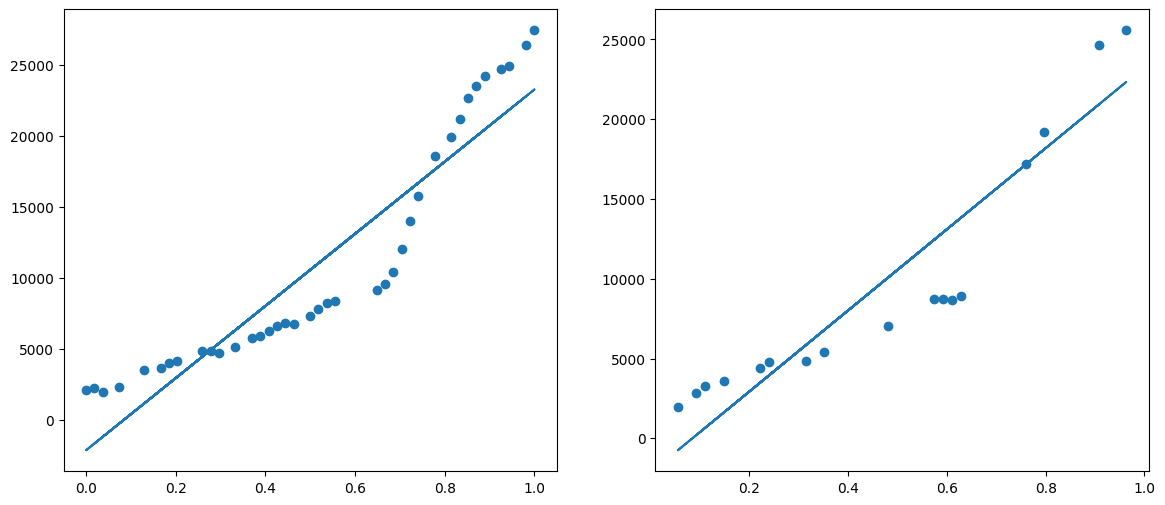

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(x_train,y_train)
plt.plot(x_train, y_pred1)

plt.subplot(1,2,2)
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

test_accuracy = r2_score(y_test, y_pred)
print("Test Accuracy (R-squared):", test_accuracy)

train_accuracy = r2_score(y_train, y_pred1)
print("Train Accuracy (R-squared):", train_accuracy)

MSE: 8392403.594685324
Test Accuracy (R-squared): 0.8434137613830943
Train Accuracy (R-squared): 0.8674755724374728


In [ ]:
x = China_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = China_Electricity_Consumption["Energy consumption per capita (kWh)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

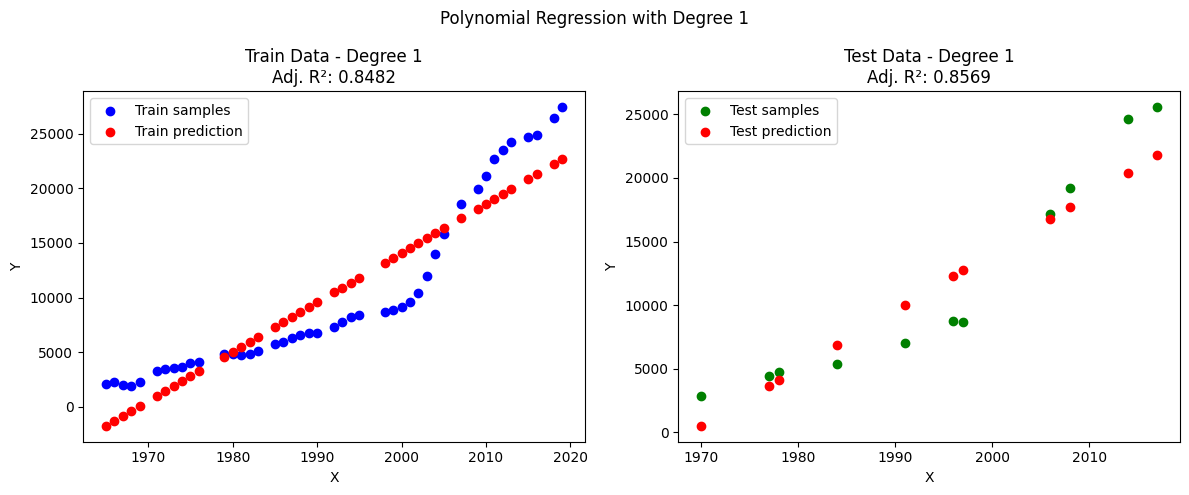

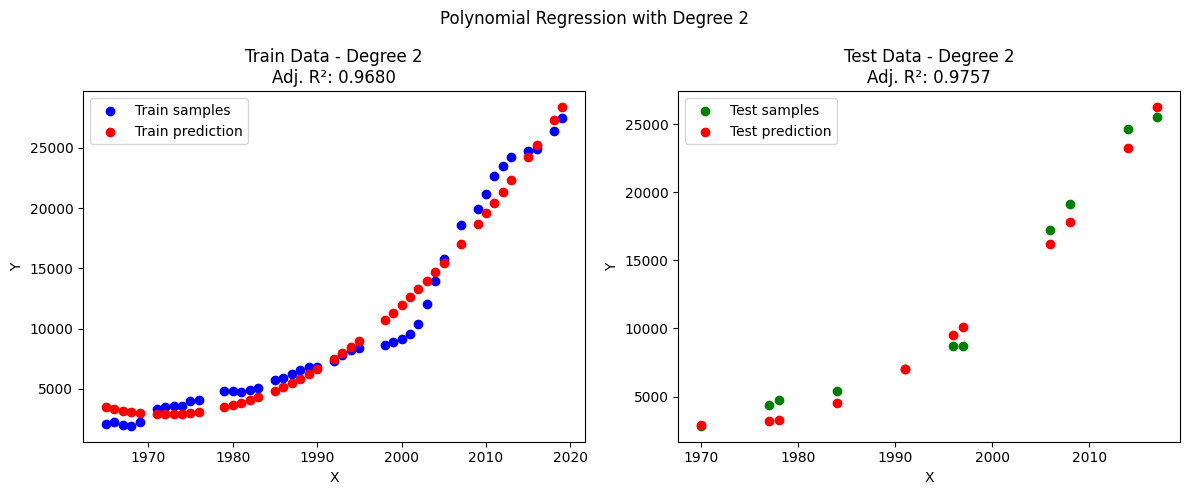

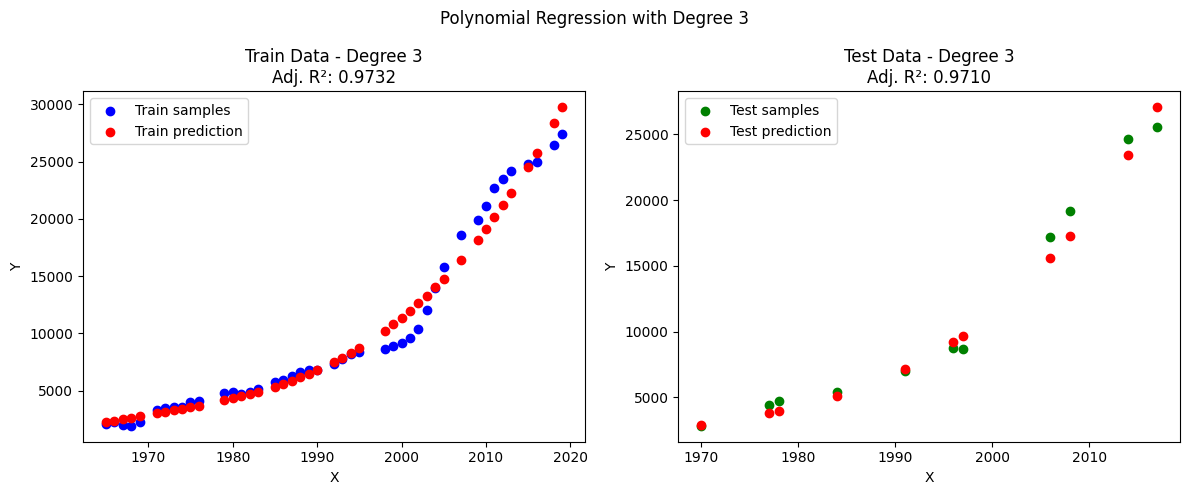

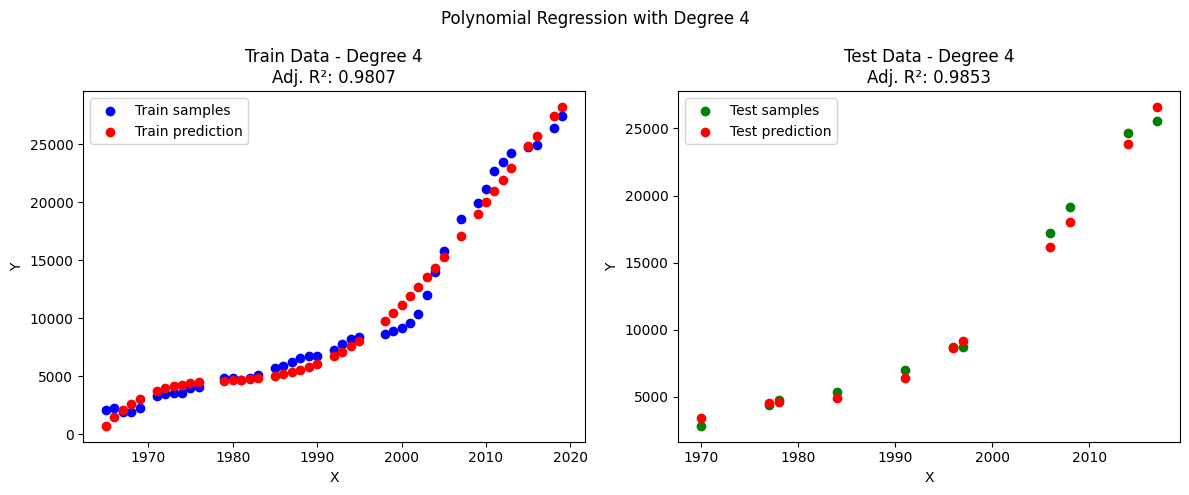

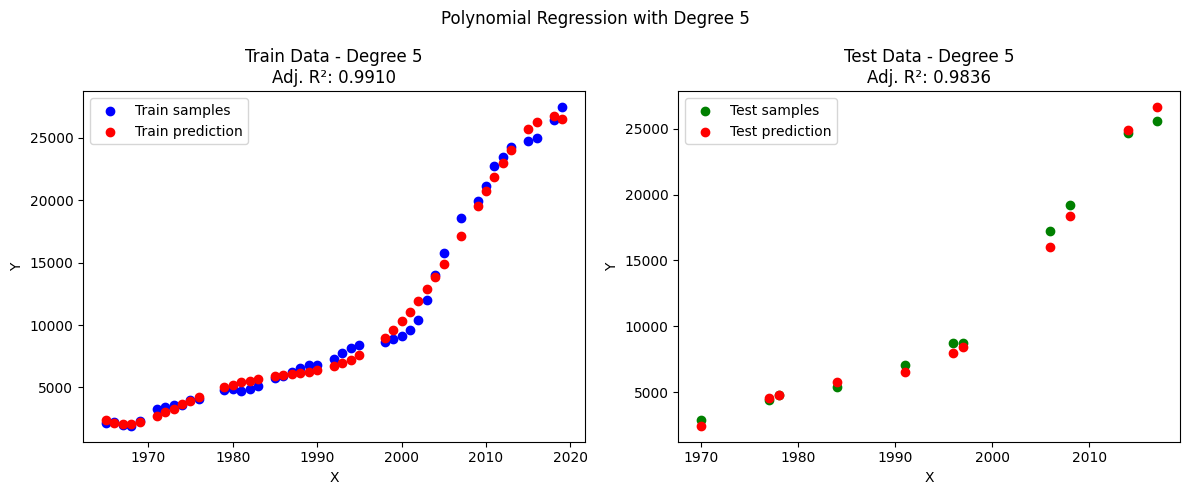

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train) # Use X_train, not x_train
    X_test_poly = poly.transform(X_test)

    #Standardization
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    #training model
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train) # Now the shapes should match

    #Prediction
    y_train_pred = model.predict(X_train_poly_scaled)
    y_test_pred = model.predict(X_test_poly_scaled)

    #calculated adjusted r2-score for train and test
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    adj_train_r2 = adj_r(train_r2, X_train_poly_scaled, y_train) # Use adj_r, not adj_r2_score
    adj_test_r2 = adj_r(test_r2, X_test_poly_scaled, y_test)

    #store scores
    scores.append((i, adj_train_r2, adj_test_r2))

    # Plotting graphs side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Training data plot
    axes[0].scatter(X_train.values.flatten(), y_train, label="Train samples", color='blue') # Flatten X_train for plotting
    axes[0].scatter(X_train.values.flatten(), y_train_pred, label="Train prediction", color='red')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    axes[0].set_title(f"Train Data - Degree {i}\nAdj. R²: {adj_train_r2:.4f}")
    axes[0].legend()

    # Test data plot
    axes[1].scatter(X_test.values.flatten(), y_test, label="Test samples", color='green') # Flatten X_test for plotting
    axes[1].scatter(X_test.values.flatten(), y_test_pred, label="Test prediction", color='red')
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")
    axes[1].set_title(f"Test Data - Degree {i}\nAdj. R²: {adj_test_r2:.4f}")
    axes[1].legend()

    plt.suptitle(f"Polynomial Regression with Degree {i}")
    plt.tight_layout()
    plt.show()

# USA Electricity Consumption Prediction

In [ ]:
USA_Electricity_Consumption = df.loc[df["Entity"]=="United States"].copy()
USA_Electricity_Consumption.drop(columns="Entity", inplace=True)

In [ ]:
x = USA_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = USA_Electricity_Consumption["Energy consumption per capita (kWh)"]

In [ ]:
USA_Electricity_Consumption.head()

,Year,Energy consumption per capita (kWh)
8447,1965,72921.759575
8448,1966,76198.585061
8449,1967,78075.334399
8450,1968,82061.022542
8451,1969,85676.866993


In [ ]:
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x["Year_encoded"] = scaler.fit_transform(x[["Year"]])
x.drop(columns="Year", inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

y_pred1 = model.predict(x_train)
y_pred1

array([87170.31232347, 85613.86851283, 86337.79586662, 85650.06488052,
       85686.26124821, 85396.69030669, 86772.15227889, 86989.33048503,
       86735.9559112 , 86446.38496969, 86229.20676355, 85975.83218972,
       86410.188602  , 86916.93774965, 87315.09779423, 85577.67214514,
       86012.02855741, 86265.40313124, 85867.24308666, 87278.90142654,
       86554.97407275, 87242.70505885, 85505.27940976, 85903.43945435,
       86048.2249251 , 86482.58133738, 85722.4576159 , 86953.13411734,
       86518.77770507, 86663.56317582, 85360.493939  , 86591.17044044,
       87061.72322041, 85794.85035128, 86808.34864658, 86301.59949893,
       85469.08304207, 85939.63582204])

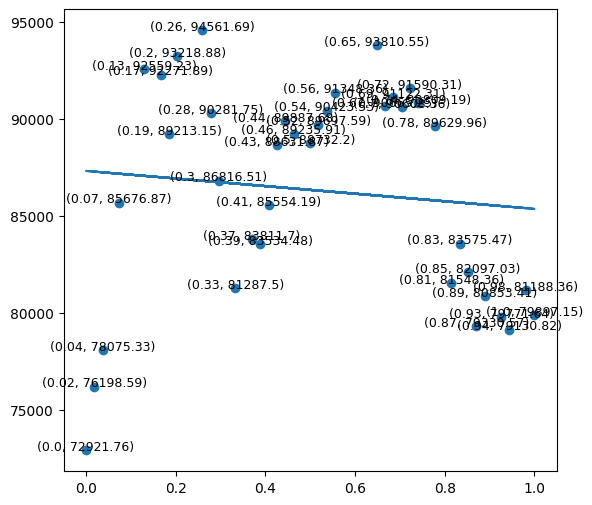

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred1)

# Adding labels to each point, rounded to 2 decimal places
for index, row in x_train.iterrows():
    plt.text(row['Year_encoded'], y_train[index],
             f'({round(row["Year_encoded"], 2)}, {round(y_train[index], 2)})',  # Round values here
             fontsize=9, ha='center')

# plt.subplot(1,2,2)
# plt.scatter(x_test,y_test)
# plt.plot(x_test, y_pred)
# plt.show()

In [ ]:
x_train.head()

,Year_encoded
8451,0.074074
8494,0.870370
8474,0.500000
8493,0.851852
8492,0.833333


In [ ]:
y_train.head()

,Energy consumption per capita (kWh)
8451,85676.866993
8494,79330.565126
8474,88732.201504
8493,82097.030006
8492,83575.468530


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

test_accuracy = r2_score(y_test, y_pred)
print("Test Accuracy (R-squared):", test_accuracy)

train_accuracy = r2_score(y_train, y_pred1)
print("Train Accuracy (R-squared):", train_accuracy)

MSE: 29299987.990283277
Test Accuracy (R-squared): -0.13016440647758087
Train Accuracy (R-squared): 0.010997313568855693


In [ ]:
x = USA_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = USA_Electricity_Consumption["Energy consumption per capita (kWh)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

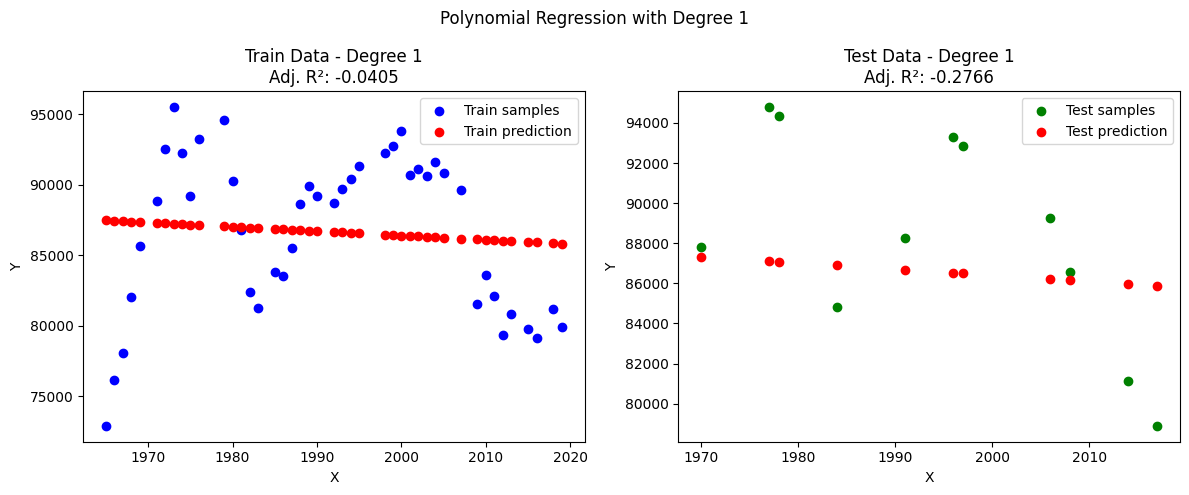

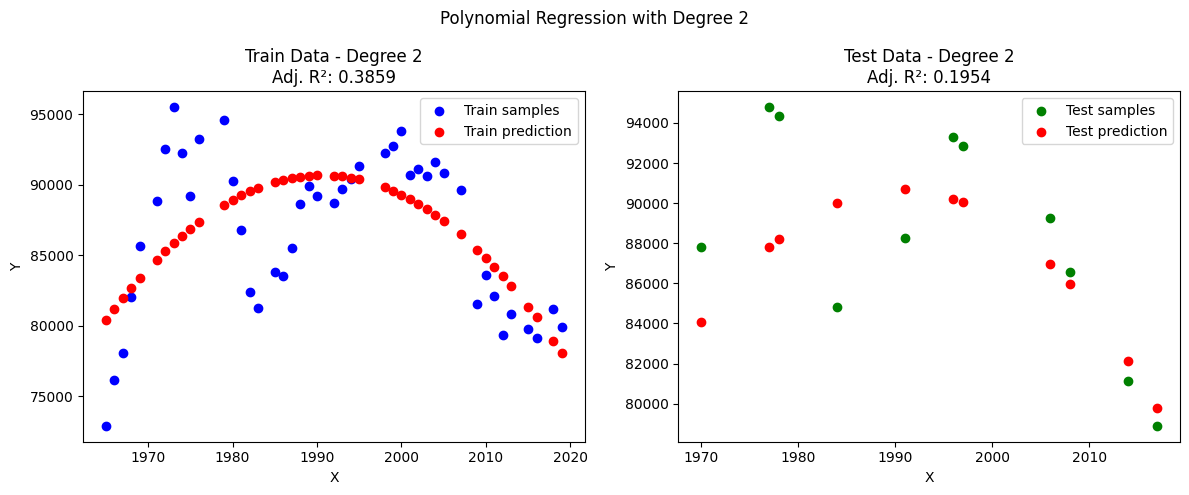

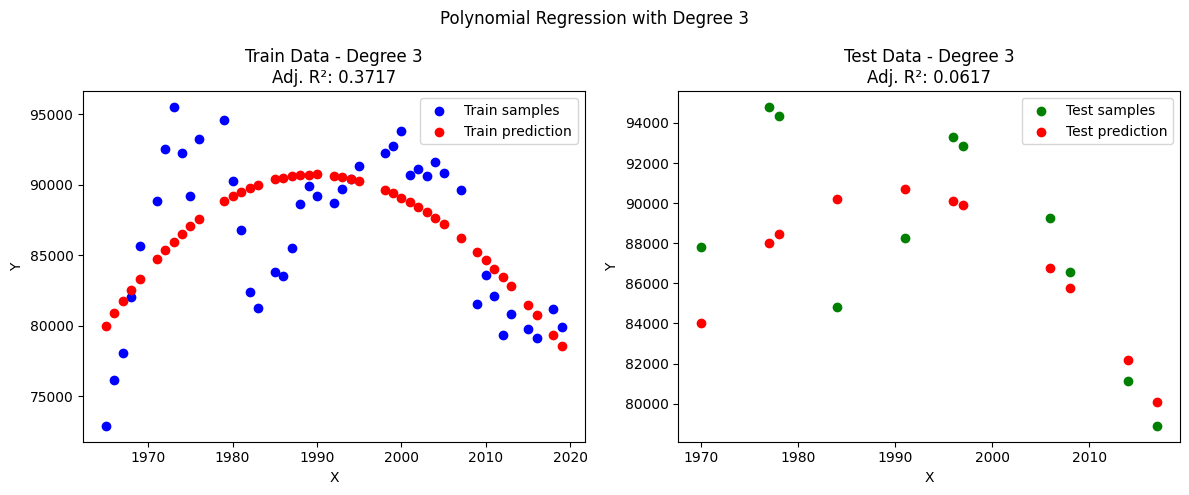

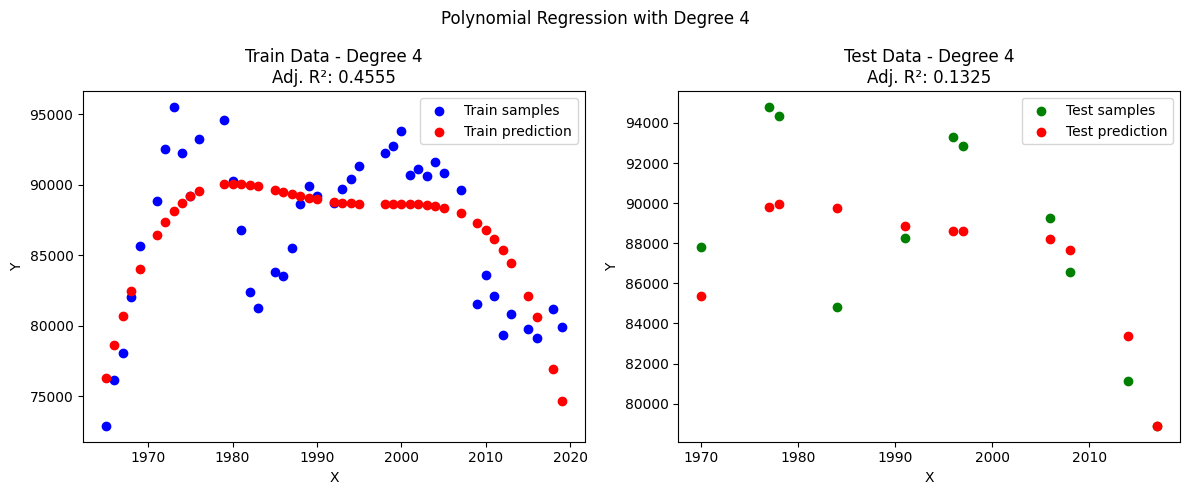

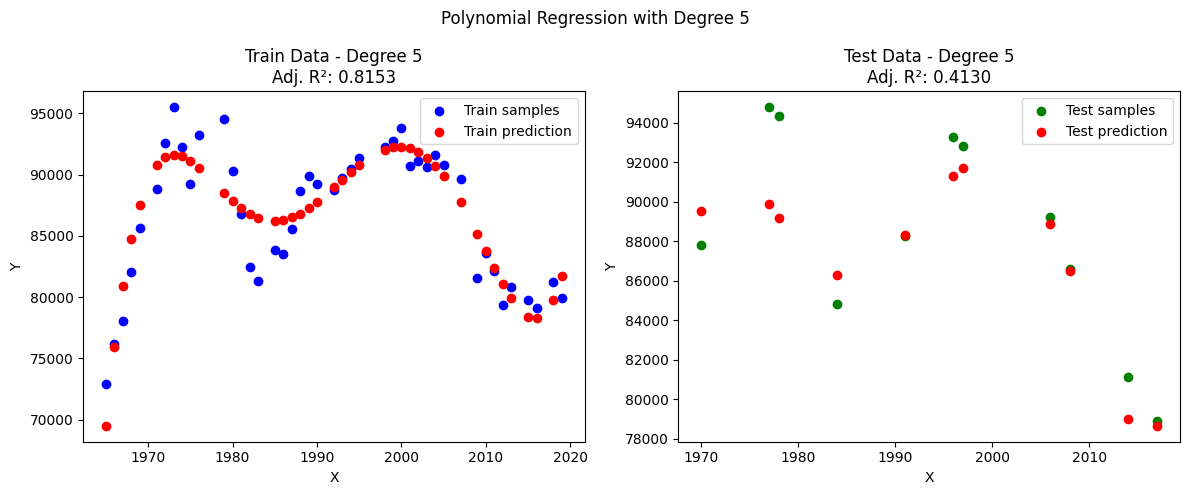

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train) # Use X_train, not x_train
    X_test_poly = poly.transform(X_test)

    #Standardization
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    #training model
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train) # Now the shapes should match

    #Prediction
    y_train_pred = model.predict(X_train_poly_scaled)
    y_test_pred = model.predict(X_test_poly_scaled)

    #calculated adjusted r2-score for train and test
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    adj_train_r2 = adj_r(train_r2, X_train_poly_scaled, y_train) # Use adj_r, not adj_r2_score
    adj_test_r2 = adj_r(test_r2, X_test_poly_scaled, y_test)

    #store scores
    scores.append((i, adj_train_r2, adj_test_r2))

    # Plotting graphs side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Training data plot
    axes[0].scatter(X_train.values.flatten(), y_train, label="Train samples", color='blue') # Flatten X_train for plotting
    axes[0].scatter(X_train.values.flatten(), y_train_pred, label="Train prediction", color='red')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    axes[0].set_title(f"Train Data - Degree {i}\nAdj. R²: {adj_train_r2:.4f}")
    axes[0].legend()

    # Test data plot
    axes[1].scatter(X_test.values.flatten(), y_test, label="Test samples", color='green') # Flatten X_test for plotting
    axes[1].scatter(X_test.values.flatten(), y_test_pred, label="Test prediction", color='red')
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")
    axes[1].set_title(f"Test Data - Degree {i}\nAdj. R²: {adj_test_r2:.4f}")
    axes[1].legend()

    plt.suptitle(f"Polynomial Regression with Degree {i}")
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=0.01) # Alpha is the Regularization strength
ridge_model = Ridge(alpha=0.09) # Alpha is the Regularization strength

In [ ]:
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

lasso_model_predictions_train = lasso_model.predict(X_train_poly_scaled)
ridge_model_predictions_train = ridge_model.predict(X_train_poly_scaled)
lasso_model_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_model_predictions = ridge_model.predict(X_test_poly_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.047e+08, tolerance: 1.350e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("Adj.R2-score for L1(lasso):", lasso_model.score(X_test_poly_scaled, y_test))
print("Adj.R2-score for L2(Ridge):", ridge_model.score(X_test_poly_scaled, y_test))

Adj.R2-score for L1(lasso): 0.08626442555584735
Adj.R2-score for L2(Ridge): 0.03425110767996997


# Decision Tree Regressor

In [ ]:
x = USA_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = USA_Electricity_Consumption["Energy consumption per capita (kWh)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

In [ ]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train R-squared: 1.0
Test R-squared: 0.8705217669117118


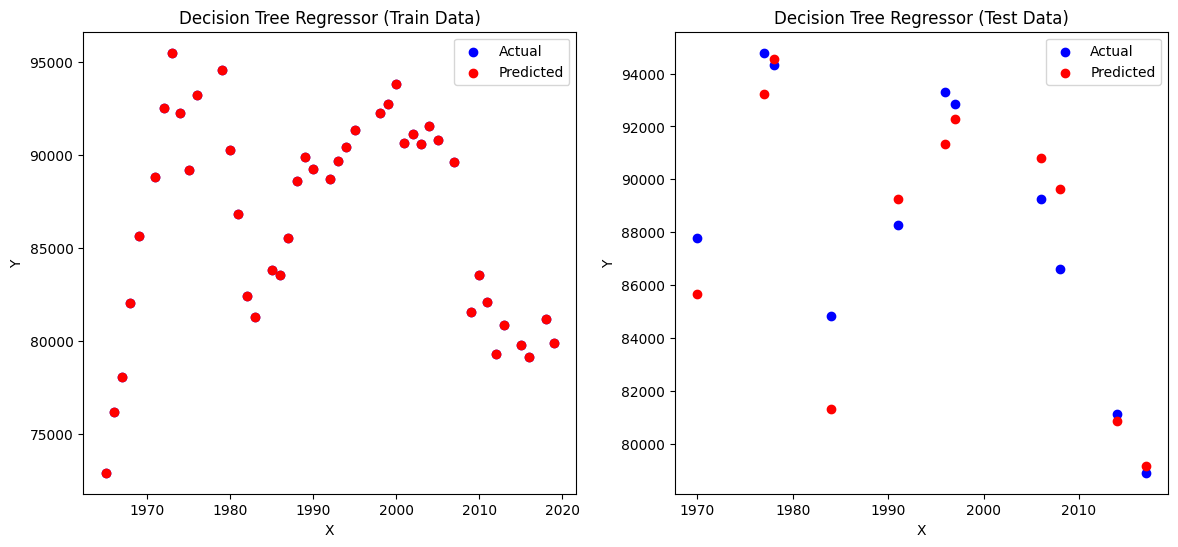

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color="blue", label="Actual")
plt.scatter(X_train, y_train_pred, color="red", label="Predicted")
plt.title("Decision Tree Regressor (Train Data)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_test_pred, color="red", label="Predicted")
plt.title("Decision Tree Regressor (Test Data)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

# How to Address Overfitting in Decision Trees:
### Prune the Tree:

Maximum Depth (max_depth): Limit the depth of the tree to prevent it from becoming too complex.

Minimum Samples per Leaf (min_samples_leaf): Increase the minimum number of samples required to be at a leaf node.

Minimum Samples per Split (min_samples_split): Increase the minimum number of samples required to split an internal node

In [ ]:
dt_regressor_pruned = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)
dt_regressor_pruned.fit(X_train, y_train)

y_train_pred_pruned = dt_regressor_pruned.predict(X_train)
y_test_pred_pruned = dt_regressor_pruned.predict(X_test)

train_r2_pruned = r2_score(y_train, y_train_pred_pruned)
test_r2_pruned = r2_score(y_test, y_test_pred_pruned)

print(f"Pruned Train R-squared: {train_r2_pruned}")
print(f"Pruned Test R-squared: {test_r2_pruned}")

Pruned Train R-squared: 0.8812638905804876
Pruned Test R-squared: 0.833140412468473


# Random Forest Regressor

In [ ]:
x = USA_Electricity_Consumption.drop(columns="Energy consumption per capita (kWh)")
y = USA_Electricity_Consumption["Energy consumption per capita (kWh)"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Step 2: Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 3: Make Predictions
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

In [ ]:
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Train R-squared: {train_r2_rf}")
print(f"Test R-squared: {test_r2_rf}")

Train R-squared: 0.9819672451831003
Test R-squared: 0.9057606067557867


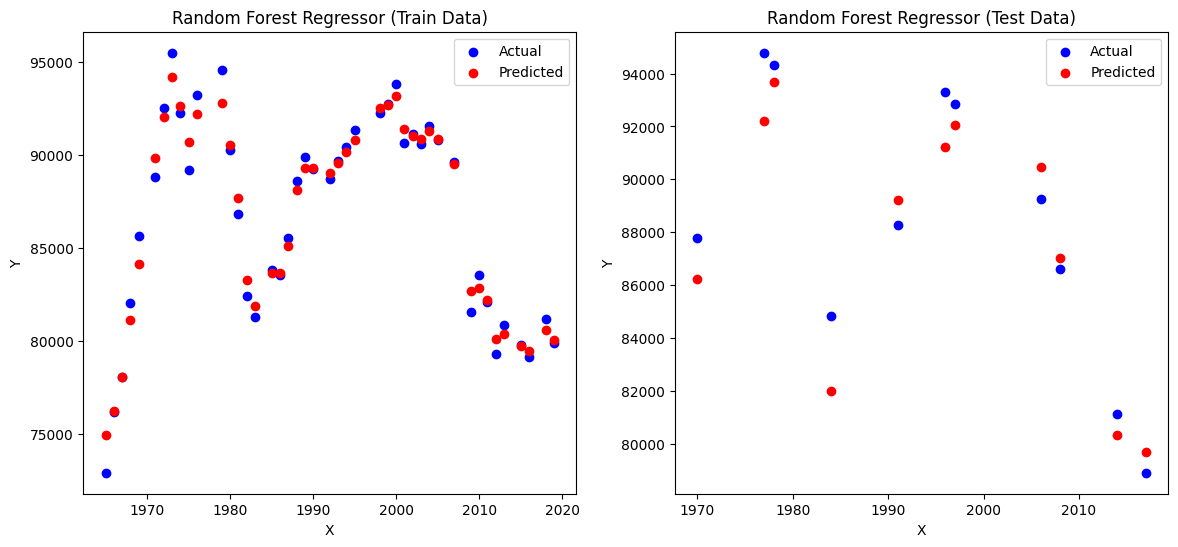

In [ ]:
plt.figure(figsize=(14, 6))

# Train data plot
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color="blue", label="Actual")
plt.scatter(X_train, y_train_pred_rf, color="red", label="Predicted")
plt.title("Random Forest Regressor (Train Data)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_test_pred_rf, color="red", label="Predicted")
plt.title("Random Forest Regressor (Test Data)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()